In [8]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')

df = pd.read_csv('dataset_ceaps_forecasting.csv')
df

,ds,y
0,2018-01-01,13062.46
1,2018-01-02,61972.66
2,2018-01-03,54424.44
3,2018-01-04,21775.57
4,2018-01-05,41703.32
...,...,...
1456,2021-12-27,28552.41
1457,2021-12-28,154547.27
1458,2021-12-29,22495.76
1459,2021-12-30,118345.56


In [9]:
dates = df['ds'].values
for i in range(len(dates)):
    dates[i] = dates[i].split('-')

df['Year'] = [int(x[0]) for x in dates]
df['Month'] = [int(x[1]) for x in dates]
df['Day'] = [int(x[2]) for x in dates]
df.drop(['ds'], axis=1, inplace=True)
df

,y,Year,Month,Day
0,13062.46,2018,1,1
1,61972.66,2018,1,2
2,54424.44,2018,1,3
3,21775.57,2018,1,4
4,41703.32,2018,1,5
...,...,...,...,...
1456,28552.41,2021,12,27
1457,154547.27,2021,12,28
1458,22495.76,2021,12,29
1459,118345.56,2021,12,30


In [13]:
years = df['Year'].values
months = df['Month'].values
days = df['Day'].values

x = df.drop('y', axis=1).values
x

array([[2018,    1,    1],
       [2018,    1,    2],
       [2018,    1,    3],
       ...,
       [2021,   12,   29],
       [2021,   12,   30],
       [2021,   12,   31]], dtype=int64)

In [14]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

target = df['y'].values

sVR = SVR()
fullPredictSVR = cross_val_predict(sVR, x, target, cv=10)
print('Mean Squared Error: %s' %(metrics.mean_squared_error(target, fullPredictSVR)))
print('R2: %s' %(metrics.r2_score(target, fullPredictSVR)))

df['SVR'] = fullPredictSVR

Mean Squared Error: 2959102608.488993
R2: -0.04289182715393425


<AxesSubplot:>

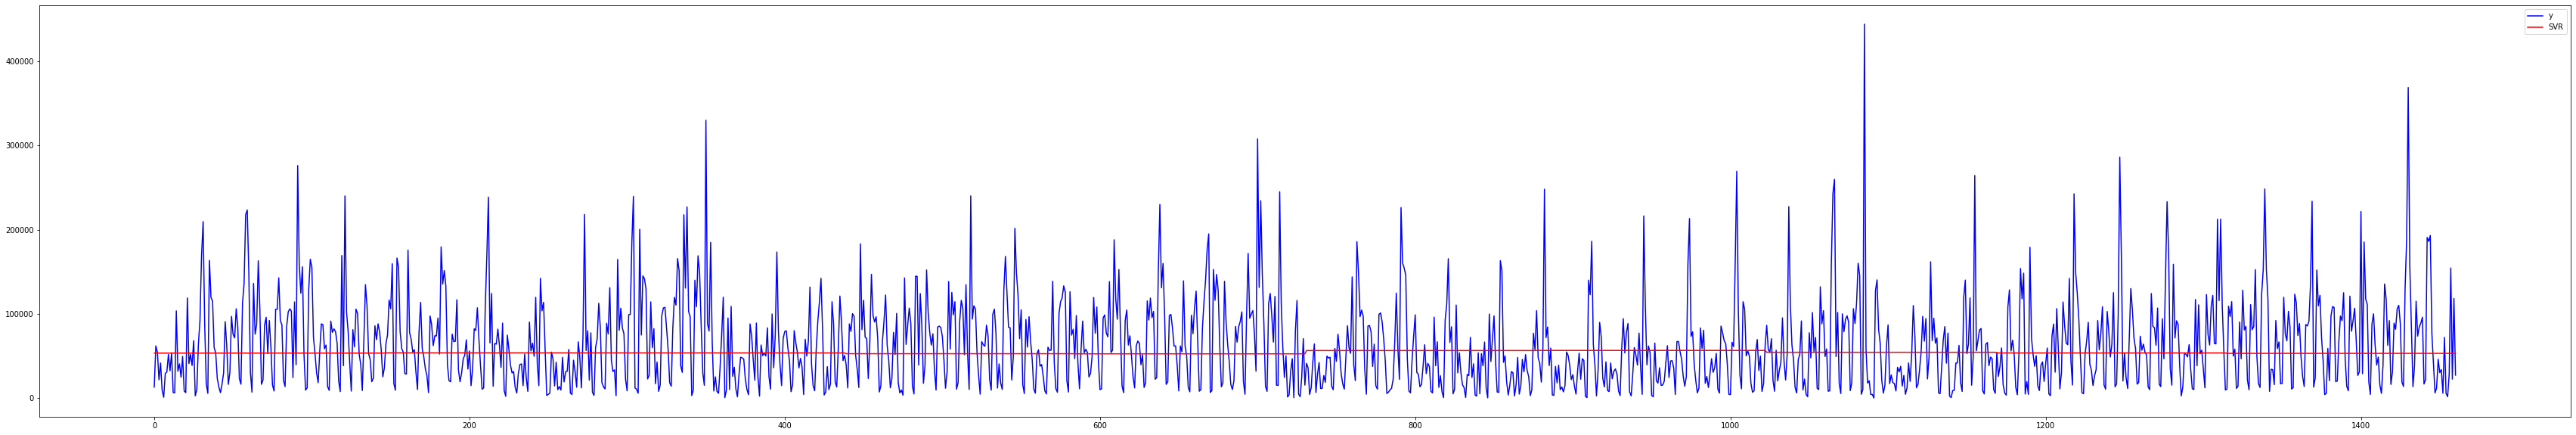

In [15]:
df.plot(y=['y', 'SVR'], figsize=(60,10), color=['blue', 'red'])